In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

def plot_acc():
    df = pd.read_csv("../n_and_r/comb_tau.csv")
    
    # Extract the ratio from the Combination and create a color mapping
    df['Ratio'] = df['Combination'].apply(lambda x: eval(x))  # Assuming the format is "n/m"
    unique_ratios = df['Ratio'].unique()
    colors = sns.color_palette("husl", len(unique_ratios))  # Get a distinct color for each unique ratio
    color_map = {ratio: color for ratio, color in zip(unique_ratios, colors)}
    
    # Plotting
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x="Combination", y="Tau", data=df, s=100, color='skyblue', edgecolor='black')
    plt.ylim(bottom=0)
    
    # Customize x-tick labels with colors
    ax = plt.gca()
    x_labels = ax.get_xticklabels()
    for label in x_labels:
        text = label.get_text()
        if '/' in text:
            num, denom = text.split('/')
            ratio = int(num) / int(denom)
            label.set_color(color_map[ratio])  # Set the color based on the ratio
    
    # Add labels and title
    plt.xlabel("Combination", fontsize=12)
    plt.ylabel("Kendall's tau", fontsize=12)
    plt.title("Scatter Plot of Combination vs Kendall's tau", fontsize=14)
    
    # Adjust the layout to prevent overlap
    # plt.tight_layout()
    
    # Create custom legend handles
    legend_handles = [mpatches.Patch(color=color_map[ratio], label=f"Ratio: {ratio}")
                      for ratio in unique_ratios]
    
    # Add the legend to the plot
    plt.legend(handles=legend_handles, title="Ratio", fontsize=10, title_fontsize=12, loc='upper right')
    
    # Add caption and note
    caption = "Figure 1: This scatter plot shows the relationship between different combinations and their Kendall's tau."
    note = "Note: Combination: # of healthy participants / # of participants"
    
    # Adjust figure layout to make room for the caption and note
    plt.subplots_adjust(bottom=0.25)
    
    plt.figtext(0.5, 0.1, caption,
                ha="center", fontsize=10, bbox=dict(facecolor='none', edgecolor='none', pad=0))
    plt.figtext(0.5, 0.05, note,
                ha="center", fontsize=9, bbox=dict(facecolor='none', edgecolor='none', pad=0))
    
    # Show the plot
    plt.show()


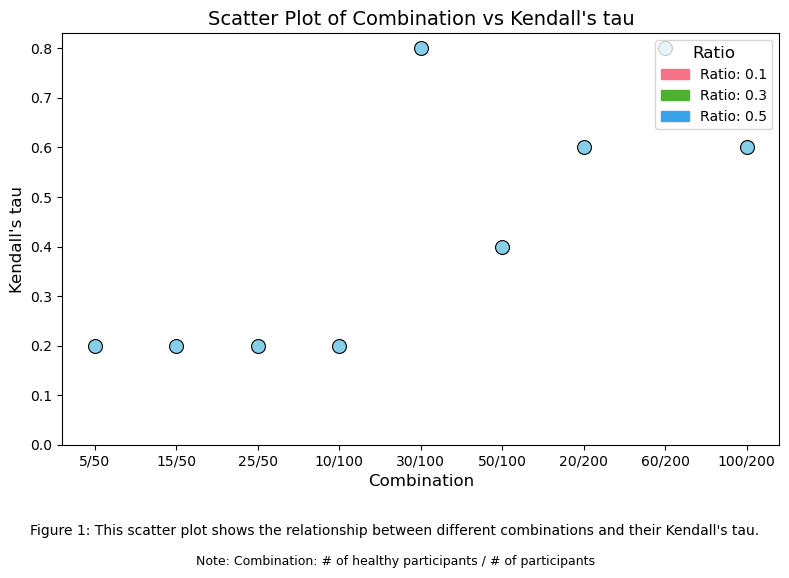

In [4]:
plot_acc()